# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [20]:
# 📚 Basic Libraries
import numpy as np # math manipulation
import pandas as pd # data manipulation
import warnings # warnings library
import regex as re #regex library

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap # for custom colours of my heatmap

# Correlation for Categorical
from scipy.stats import chi2_contingency # to calculate the independence of two categorical variables with chi-square
from scipy.stats.contingency import association # to calculate the strength of categorical relations with cramer


# 🤖 Machine Learning for Categorical
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# 🤖 Machine Learning for Numerical Continous
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

## Regression Model Evaluation

In [21]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [22]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [23]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [24]:
df = data.copy()

In [25]:
def snake_columns(data):
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

def camel_to_snake(data):
    data.columns = data.rename(columns=lambda column: re.sub('([a-z0-9])([A-Z])', r'\1_\2', data).lower() )

def view_data(data): # returns shape, data types & shows a small sample
    print(f"Data has these rows {data.shape[0]} and columns {data.shape[1]}")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

def check_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicated_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {duplicated_rows} duplicate rows. Also;")
    return exploration

In [26]:
snake_columns(df)

In [27]:
view_data(df)

Data has these rows 506 and columns 14

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

Data row sample and full columns:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
215,0.19802,0.0,10.59,0,0.489,6.182,42.4,3.9454,4,277.0,18.6,393.63,9.47,25.0
392,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666.0,20.2,396.90,25.68,9.7
186,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666.0,20.2,396.90,22.88,12.8
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252.0,18.3,395.62,1.98,34.9


In [28]:
check_data(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
crim,0,0
zn,0,0
indus,0,0
chas,0,0
nox,0,0
rm,0,0
age,0,0
dis,0,0
rad,0,0
tax,0,0


In [29]:
df.nunique().sort_values(ascending=False)

crim       504
lstat      455
rm         446
dis        412
b          357
age        356
medv       229
nox         81
indus       76
tax         66
ptratio     46
zn          26
rad          9
chas         2
dtype: int64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<Axes: xlabel='medv', ylabel='Count'>

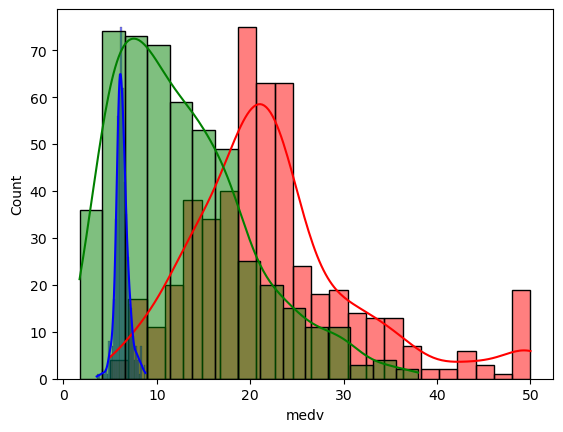

In [31]:
sns.histplot(df["medv"], color="red", kde=True)
sns.histplot(df["rm"], color="blue", kde=True)
sns.histplot(df["lstat"], color="green", kde=True)

In [32]:
df.corrwith(df["medv"]).sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
dtype: float64

<Axes: xlabel='medv', ylabel='lstat'>

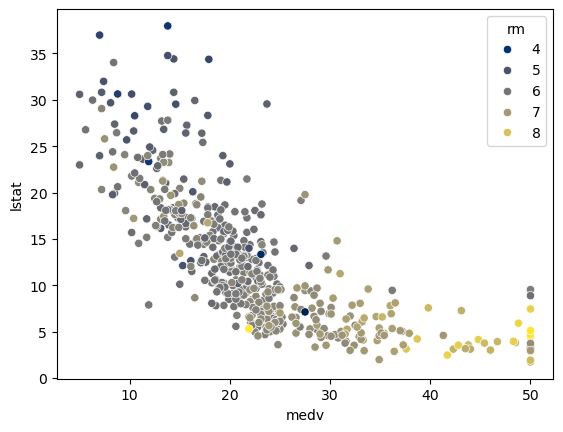

In [33]:
sns.scatterplot(x="medv", y="lstat", hue="rm", data=df, palette="cividis")

The more expensive the more rooms the house has and the less is the % of lower status of the population.

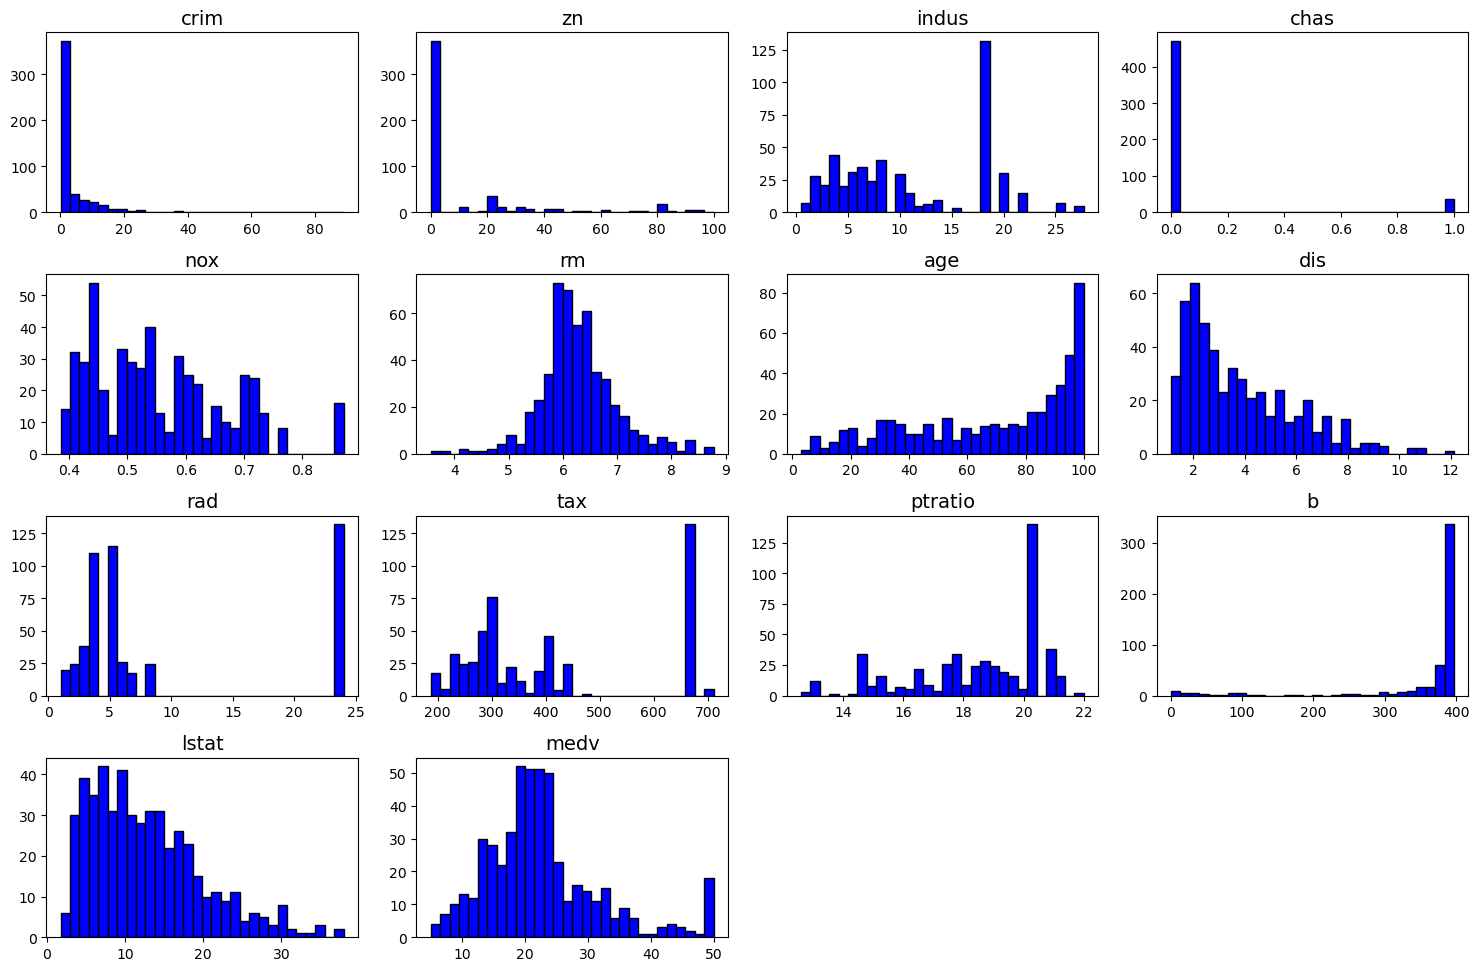

In [34]:
color = 'blue'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i], fontsize=14)

plt.tight_layout()
plt.show()

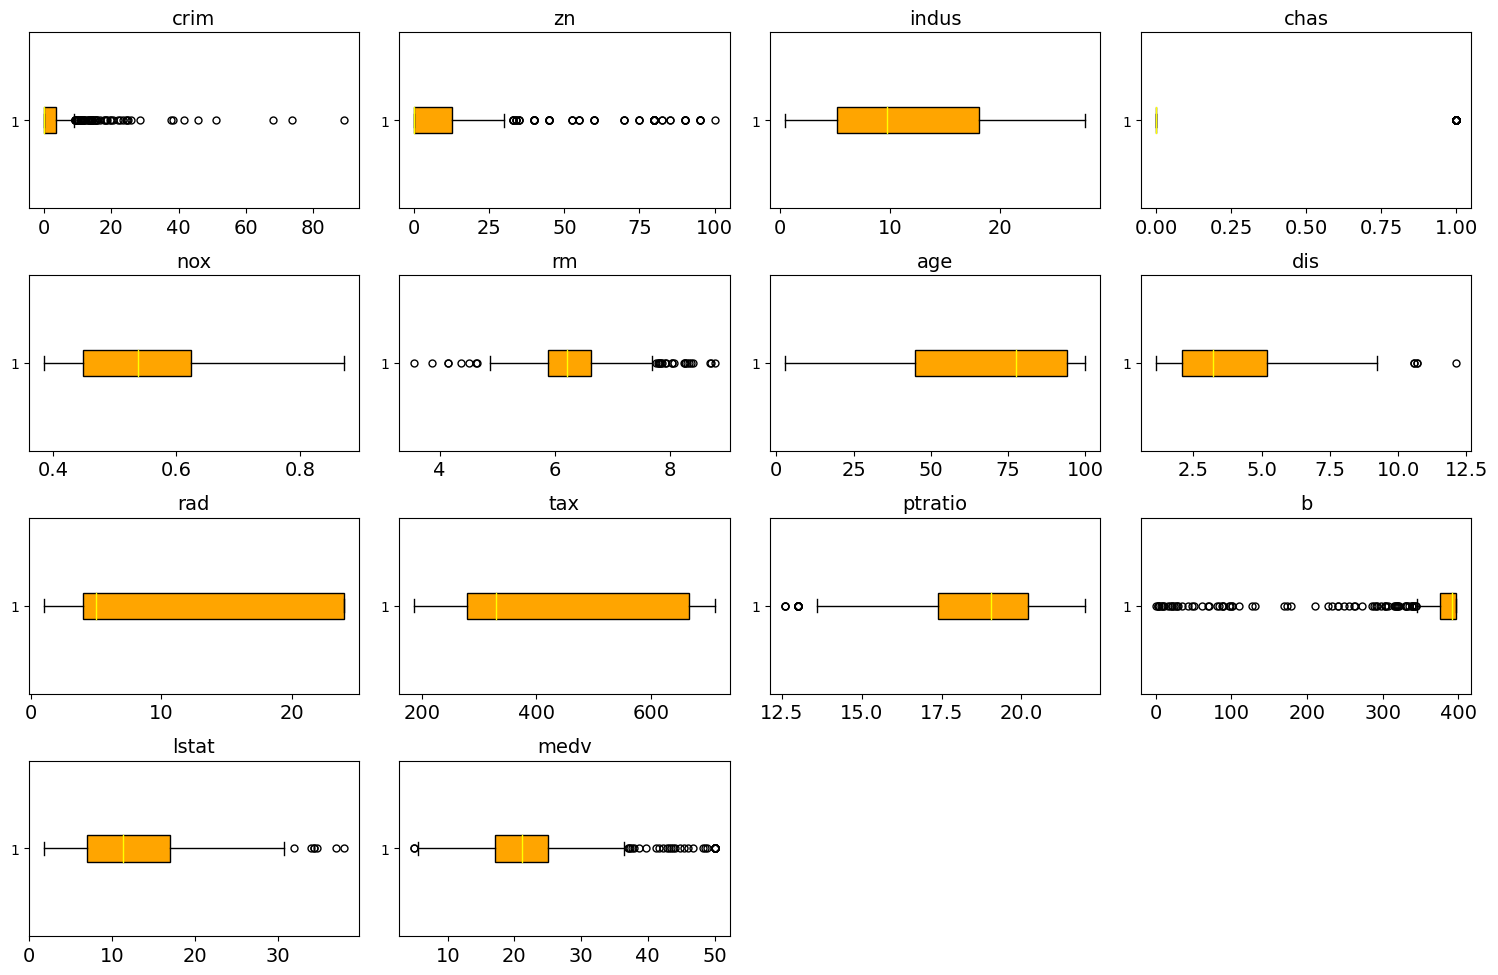

In [35]:
color = 'orange'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=14)
    ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()

In [36]:
num_corr = df.corr().round(2)

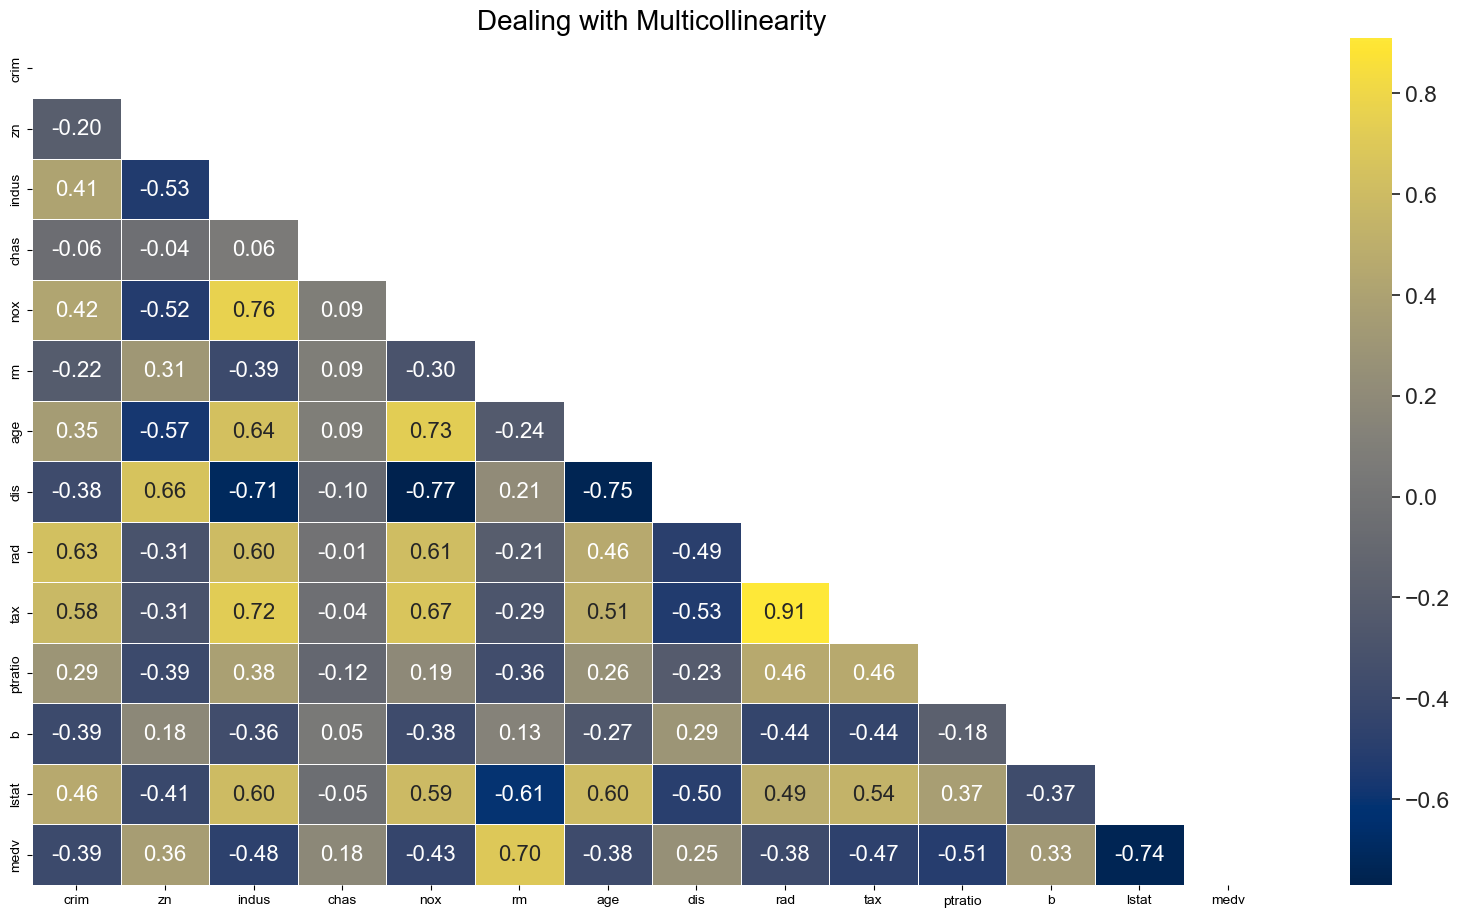

In [37]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 11))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 16}, linewidths=.5, cmap="cividis", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Observations:
- The weighted distance to five Boston employment centers has high negative multicollinearity with a lot of other columns. 

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [38]:
X = df.drop("medv", axis=1)
y = df["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 506.
70% for training data: 404.
30% for test data: 102.


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [41]:
r2_3 = r2_score(y_test, predictions)
print(r2_3)

0.6687594935356314


## 4. Calculate and print mean squared error for both the training and the testing set.

In [42]:
MSE_3 = mean_squared_error(y_test, predictions)
print(MSE_3)

24.29111947497357


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [43]:
MAE_3 = mean_absolute_error(y_test, predictions)
print(MAE_3)

3.1890919658878496


## Classification Model Evaluation

In [44]:
from sklearn.datasets import load_iris
data = load_iris()

In [45]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
column_names = data.feature_names

In [47]:
df = pd.DataFrame(data['data'],columns=column_names)

In [48]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
target = pd.DataFrame(data.target)

In [50]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [52]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# EDA on the Iris Dataset

In [53]:
df["target"] = target #combine all to one dataset

In [54]:
snake_columns(df) # lower casing the columns

In [55]:
view_data(df)

Data has these rows 150 and columns 5

sepal_length_(cm)    float64
sepal_width_(cm)     float64
petal_length_(cm)    float64
petal_width_(cm)     float64
target                 int64
dtype: object

Data row sample and full columns:


,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
75,6.6,3.0,4.4,1.4,1
90,5.5,2.6,4.4,1.2,1
103,6.3,2.9,5.6,1.8,2
19,5.1,3.8,1.5,0.3,0
25,5.0,3.0,1.6,0.2,0


In [56]:
check_data(df)

There are 1 duplicate rows. Also;


,NaN,EmptySpaces
sepal_length_(cm),0,0
sepal_width_(cm),0,0
petal_length_(cm),0,0
petal_width_(cm),0,0
target,0,0


In [57]:
duplicated_rows = df[df.duplicated(keep=False)]

print(duplicated_rows)

     sepal_length_(cm)  sepal_width_(cm)  petal_length_(cm)  petal_width_(cm)  \
101                5.8               2.7                5.1               1.9   
142                5.8               2.7                5.1               1.9   

     target  
101       2  
142       2  


# Decision on Duplicates

I decide to leave the duplicate row in the dataframe in order to have perfect class balance.

In [58]:
target.value_counts() # checking the balance with count

0    50
1    50
2    50
Name: count, dtype: int64

Text(0.5, 1.0, 'Data Balance')

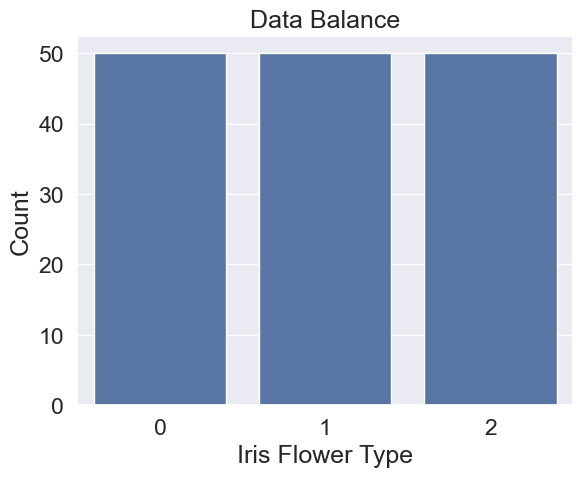

In [59]:
sns.countplot(data=df, x="target") #checking the balance visually
plt.xlabel("Iris Flower Type")
plt.ylabel("Count")
plt.title("Data Balance")

The data is very balanced and there is enough data per type for learning.

Text(0, 0.5, 'Count')

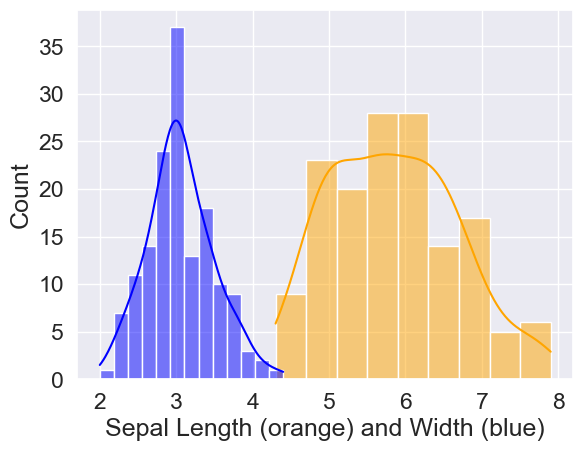

In [60]:
sns.histplot(df["sepal_length_(cm)"], color="orange", kde=True)
sns.histplot(df["sepal_width_(cm)"], color="blue", kde=True)
plt.xlabel("Sepal Length (orange) and Width (blue)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

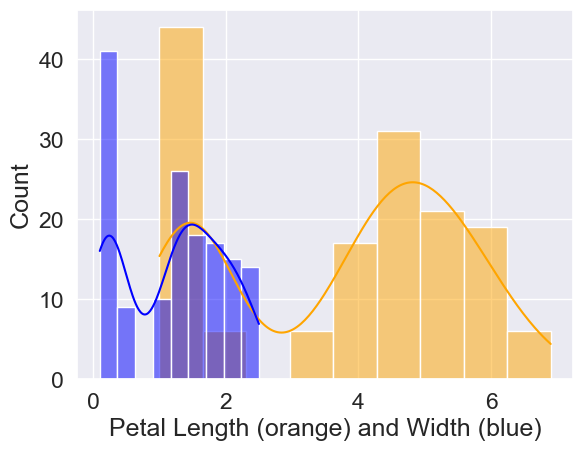

In [61]:
sns.histplot(df["petal_length_(cm)"], color="orange", kde=True)
sns.histplot(df["petal_width_(cm)"], color="blue", kde=True)
plt.xlabel("Petal Length (orange) and Width (blue)")
plt.ylabel("Count")

<Axes: xlabel='sepal_length_(cm)', ylabel='petal_length_(cm)'>

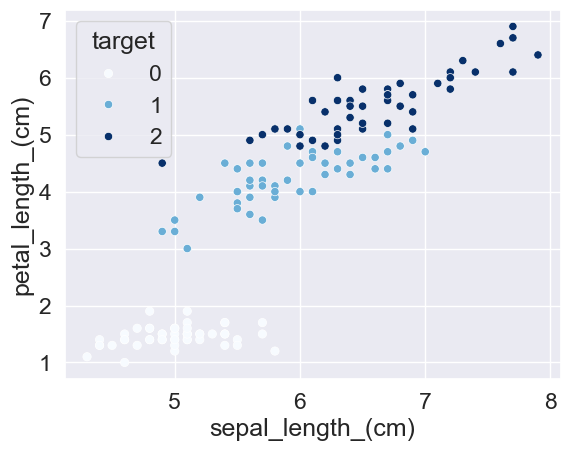

In [62]:
sns.scatterplot(x="sepal_length_(cm)", y="petal_length_(cm)", hue="target", data=df, palette="Blues")

We can see very nicely here that each flower has its own sepal and petal length range

<Axes: xlabel='sepal_width_(cm)', ylabel='petal_width_(cm)'>

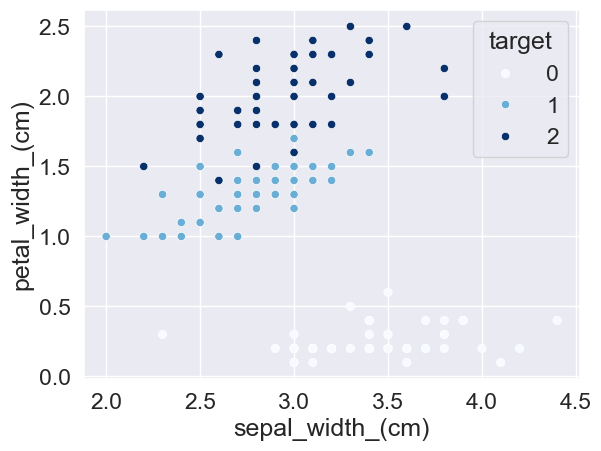

In [63]:
sns.scatterplot(x="sepal_width_(cm)", y="petal_width_(cm)", hue="target", data=df, palette="Blues")

We can see very nicely here that each flower has a different sepal and petal width range.

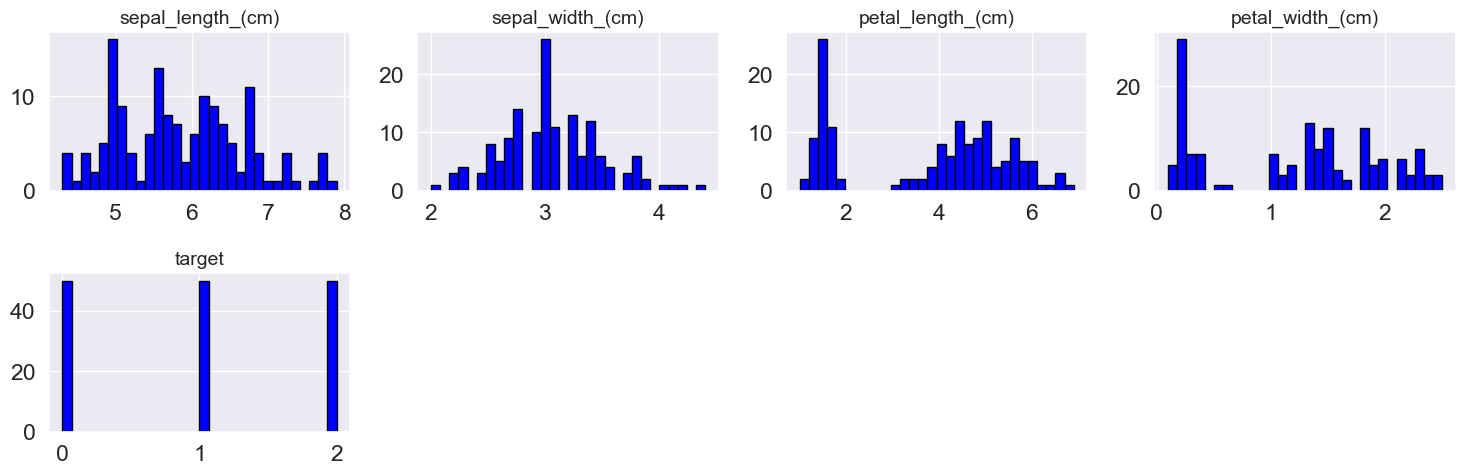

In [64]:
color = 'blue'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i], fontsize=14)

plt.tight_layout()
plt.show()

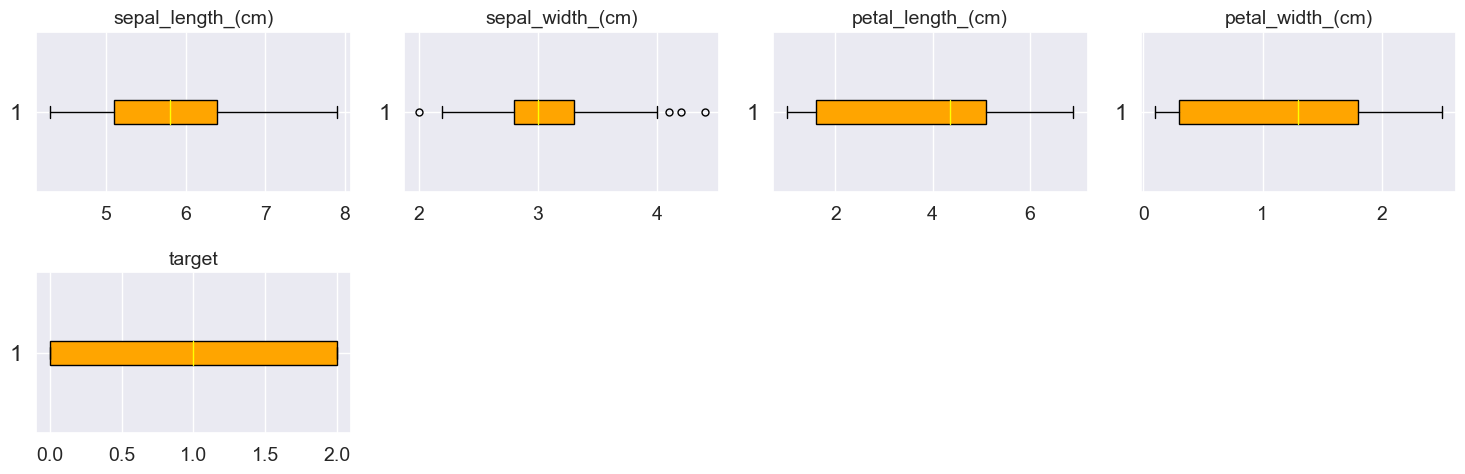

In [65]:
color = 'orange'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=14)
    ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()

In [66]:
list(df.columns)

['sepal_length_(cm)',
 'sepal_width_(cm)',
 'petal_length_(cm)',
 'petal_width_(cm)',
 'target']

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [72]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [85]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  1.0
Train data accuracy:  0.975


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [86]:
from sklearn.metrics import balanced_accuracy_score
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
print("Test data balanced accuracy: ", balanced_accuracy_score(y_test, predictions_test))
print("Train data balanced accuracy: ", balanced_accuracy_score(y_train, predictions_train))

Test data balanced accuracy:  1.0
Train data balanced accuracy:  0.975609756097561


## 10. Calculate and print the precision score for both the training and the testing set.

In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions_test,  average='weighted')
print(f'Precision for test data: {precision:.2f}')

Precision for test data: 1.00


In [102]:
precision = precision_score(y_train, predictions_train,  average='weighted')
print(f'Precision for train data: {precision:.2f}')

Precision for train data: 0.98


## 11. Calculate and print the recall score for both the training and the testing set.

In [101]:
recall = recall_score(y_test, predictions_test, average='weighted')
print(f'Recall for test data: {recall:.2f}')

Recall for test data: 1.00


In [100]:
recall = recall_score(y_train, predictions_train, average='weighted')
print(f'Recall for training data: {recall:.2f}')

Recall for training data: 0.97


## 12. Calculate and print the F1 score for both the training and the testing set.

In [104]:
f1 = f1_score(y_test, predictions_test, average='weighted')
print(f'F1 Score for test data: {f1:.2f}')

F1 Score for test data: 1.00


In [105]:
f1 = f1_score(y_train, predictions_train, average='weighted')
print(f'F1 Score for training data: {f1:.2f}')

F1 Score for training data: 0.97


## 13. Generate confusion matrices for both the training and the testing set.

<Figure size 800x600 with 0 Axes>

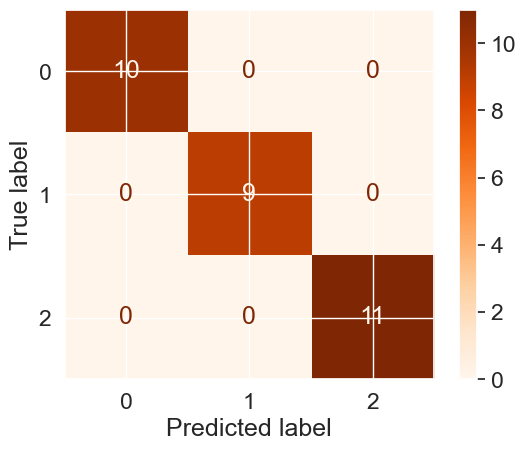

In [88]:
cm_test = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

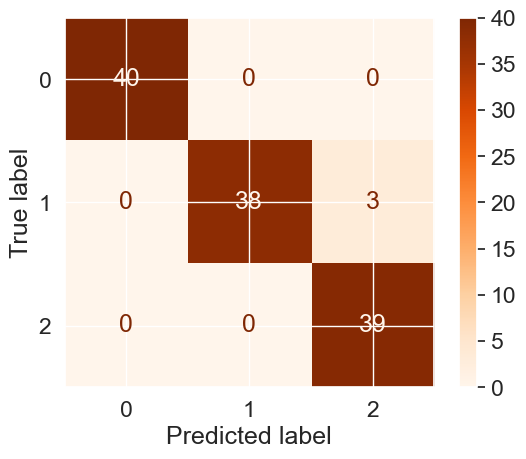

In [89]:
cm_train = confusion_matrix(y_train, predictions_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [ ]:
# Have fun here !